## Week 2 Assessment: Distances and Angles between Images

In this week, we are going to compute the distances and angles between images.

## Learning Objectives

By the end of this notebook, you will learn to 

1. Write programs to compute distance.
2. Write programs to compute angle.

_distance_ and _angle_ are useful beyond their usual interpretation. They are useful for describing __similarity__ between objects. You will
first use the functions you wrote to compare the similarity between MNIST digits. Furthermore, we will use these concepts to implement the K Nearest Neighbors algorithm, which is a useful algorithm for classifying object according to distance.

In [6]:
# PACKAGE: DO NOT EDIT
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [8]:
%%javascript
// Some javascript to provide better layout for plots we have later.
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};

<IPython.core.display.Javascript object>


Recall that the distance defined by the dot product is 
$$ d(\boldsymbol{x},\boldsymbol{y}) = \lVert \boldsymbol{x} - \boldsymbol{y} \rVert, $$
and the angle defined by the dot product is 
$$ \boldsymbol{x}^T \boldsymbol{y} = \lVert \boldsymbol{x} \rVert \lVert \boldsymbol{y} \rVert cos \theta$$

In [46]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE

# ===YOU SHOULD EDIT THIS FUNCTION===
def distance(x, y):
    """Compute distance between two vectors x, y using the dot product"""
    x = np.array(x, dtype=np.float).ravel() # ravel() "flattens" the ndarray
    y = np.array(y, dtype=np.float).ravel()
    z = x-y
    distance = np.sqrt(z.T@z) 
    return distance


# ===YOU SHOULD EDIT THIS FUNCTION===
def angle(x, y):
    """Compute the angle between two vectors x, y using the dot product"""
    norm_x = np.sqrt(x.T@x)
    norm_y = np.sqrt(y.T@y)
    angle = np.arccos((x.T@y)/(norm_x*norm_y))
    return angle

# ===YOU SHOULD EDIT THIS FUNCTION===
def pairwise_distance_matrix(X, Y):
    """Compute the pairwise distance between rows of X and rows of Y

    Arguments
    ----------
    X: ndarray of size (N, D)
    Y: ndarray of size (M, D)
    
    Returns
    --------
    D: matrix of shape (N, M), each entry D[i,j] is the distance between
    X[i,:] and Y[j,:] using the dot product.
    """
    N, D = X.shape
    M, _ = Y.shape
    distance_matrix = np.zeros((N, M), dtype=np.float)
    for i in range(N):
        for j in range(M):
            distance_matrix[i,j] = distance(X[i,:], Y[j,:])
    
    return distance_matrix

In [83]:
# ===YOU SHOULD EDIT THIS FUNCTION===
def pairwise_distance_matrix_np(X, Y):
    """Compute the pairwise distance between rows of X and rows of Y

    Arguments
    ----------
    X: ndarray of size (N, D)
    Y: ndarray of size (M, D)
    
    Returns
    --------
    D: matrix of shape (N, M), each entry D[i,j] is the distance between
    X[i,:] and Y[j,:] using the dot product.
    """
    N, D = X.shape
    M, _ = Y.shape
    distance_matrix = np.zeros((N, M), dtype=np.float)
    for i in range(N):
        distance_matrix[i] = np.linalg.norm(Y-X[i,:], axis = 1)
    
    return distance_matrix

In [56]:
a = np.array([[2,1],[2,2]])
b = np.array([[0,1],[3,1]])
print(pairwise_distance_matrix(a, b))

[[ 2.          1.        ]
 [ 2.23606798  1.41421356]]


In [84]:
print(pairwise_distance_matrix_np(a, b))

[[ 2.          1.        ]
 [ 2.23606798  1.41421356]]


In [82]:
c = np.array([[-2, 0], [1,0]])
np.linalg.norm(c, axis = 1)

array([ 2.,  1.])

For `pairwise_distance_matrix`, you may be tempting to iterate through
rows of X and Y and fill in the distance matrix, but that is slow! Can you
think of some way to vectorize your computation (i.e. make it faster by using numpy/scipy operations only)

In [86]:
def plot_vector(v, w):
    """Plot two vectors `v` and `w` of dimension 2"""
    fig = plt.figure(figsize=(4,4))
    ax = fig.gca()
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.grid()
    ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, 
             length_includes_head=True, linewidth=2, color='r');
    ax.arrow(0, 0, w[0], w[1], head_width=0.05, head_length=0.1, 
             length_includes_head=True, linewidth=2, color='r');

In [87]:
# Some sanity checks, you may want to have more interesting test cases to test your implementation
a = np.array([1,0])
b = np.array([0,1])
np.testing.assert_almost_equal(distance(a, b), np.sqrt(2))
assert((angle(a,b) / (np.pi * 2) * 360.) == 90)
print('correct')

correct


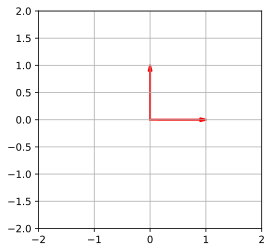

In [88]:
plot_vector(b, a)

In [89]:
import sklearn
from sklearn.datasets import fetch_mldata
from ipywidgets import interact
MNIST = fetch_mldata('MNIST original', data_home='./MNIST')

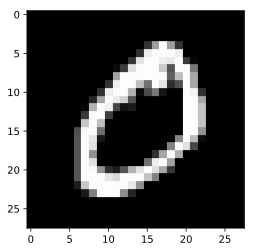

In [90]:
plt.imshow(MNIST.data[MNIST.target==0].reshape(-1, 28, 28)[0], cmap='gray');

But we have the following questions:

1. What does it mean for two digits in the MNIST dataset to be _different_ by our distance function? 
2. Furthermore, how are different classes of digits different for MNIST digits? Let's find out!

For the first question, we can see just how the distance between digits compare among all distances for 
the first 500 digits;

In [91]:
distances = []
for i in range(len(MNIST.data[:500])):
    for j in range(len(MNIST.data[:500])):
        distances.append(distance(MNIST.data[i], MNIST.data[j]))

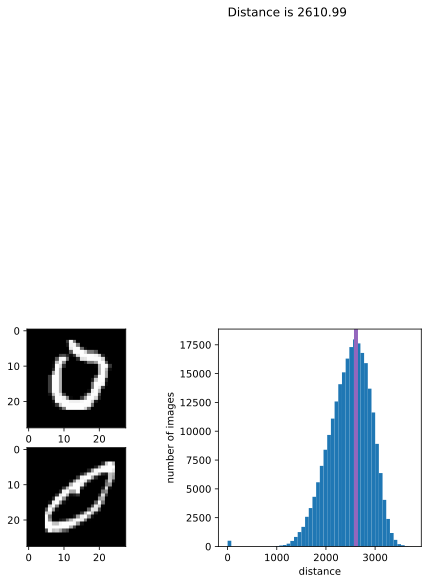

In [92]:
@interact(first=(0, 499), second=(0, 499), continuous_update=False)
def show_img(first, second):
    plt.figure(figsize=(8,4))
    f = MNIST.data[first].reshape(28, 28)
    s = MNIST.data[second].reshape(28, 28)
    
    ax0 = plt.subplot2grid((2, 2), (0, 0))
    ax1 = plt.subplot2grid((2, 2), (1, 0))
    ax2 = plt.subplot2grid((2, 2), (0, 1), rowspan=2)
    
    #plt.imshow(np.hstack([f,s]), cmap='gray')
    ax0.imshow(f, cmap='gray')
    ax1.imshow(s, cmap='gray')
    ax2.hist(np.array(distances), bins=50)
    d = distance(f, s)
    ax2.axvline(x=d, ymin=0, ymax=40000, color='C4', linewidth=4)
    ax2.text(0, 46000, "Distance is {:.2f}".format(d), size=12)
    ax2.set(xlabel='distance', ylabel='number of images')
    plt.show()

In [95]:
min = distance(MNIST.data[0], MNIST.data[1])
index = -1
for i in range(2, len(MNIST.data)):
    if(distance(MNIST.data[0], MNIST.data[i])<min):
        min = distance(MNIST.data[0], MNIST.data[i])
        index = i
print(index)

61


In [96]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE

# ===YOU SHOULD EDIT THIS FUNCTION===
def most_similar_image():
    """Find the index of the digit, among all MNIST digits (excluding the first),
       that is the closest to the first image in the dataset, your answer should be a single integer

       Note:
       Use another cell to write some code snippets to find out this index.
       Then fill it in here. The autograder does not have access to the MNIST dataset,
       so any mentions of MNIST inside this will fail.
    """
    most_similar_index = 61
    return most_similar_index

For the second question, we can compute a `mean` image for each class of image, i.e. we compute mean image for digits of `1`, `2`, `3`... `9`, then we compute pairwise distance between them. We can organize the pairwise distances in a 2D plot, which would allow us to visualize the dissimilarity between images of different classes.

First we compute the mean for digits of each class.

In [97]:
means = {}
for n in np.unique(MNIST.target).astype(np.int):
    means[n] = np.mean(MNIST.data[MNIST.target==n], axis=0)

For each pair of classes, we compute the pairwise distance and 
store them into MD (mean distances). We store the angles between the mean digits in AG

In [99]:
MD = np.zeros((10, 10))
AG = np.zeros((10, 10))
for i in means.keys():
    for j in means.keys():
        MD[i, j] = distance(means[i], means[j])
        AG[i, j] = angle(means[i], means[j])

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in arccos


Now we can visualize the distances! Here we put the pairwise distances. The colorbar
shows how the distances map to color intensity.

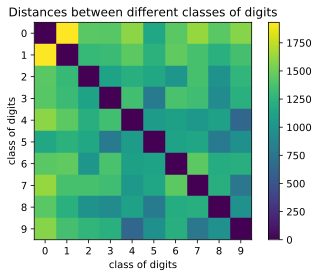

In [100]:
fig, ax = plt.subplots()
grid = ax.imshow(MD, interpolation='nearest')
ax.set(title='Distances between different classes of digits',
       xticks=range(10), 
       xlabel='class of digits',
       ylabel='class of digits',
       yticks=range(10))
fig.colorbar(grid)
plt.show()

Similarly for the angles.

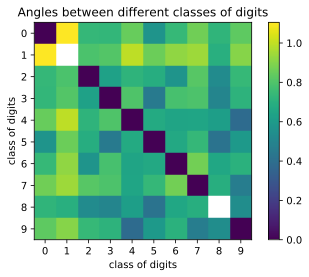

In [101]:
fig, ax = plt.subplots()
grid = ax.imshow(AG, interpolation='nearest')
ax.set(title='Angles between different classes of digits',
       xticks=range(10), 
       xlabel='class of digits',
       ylabel='class of digits',
       yticks=range(10))
fig.colorbar(grid)
plt.show();

## 2. K Nearest Neighbors (Optional)


In this section, we will explore the [KNN classification algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).
A classification algorithm takes input some data and use the data to 
determine which class (category) this piece of data belongs to.

![flower](https://archive.ics.uci.edu/ml/assets/MLimages/Large53.jpg)

As a motivating example, consider the [iris flower dataset](https://archive.ics.uci.edu/ml/datasets/iris). The dataset consists
of 150 data points where each data point is a feature vector $\boldsymbol x \in \mathbb{R}^4$ describing the attribute of a flower in the dataset, the four dimensions represent 

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 


and the corresponding target $y \in \mathbb{R}$ describes the class of the flower. There are 3 classes of flowers in this dataset.

1. Iris Setosa
2. Iris Versicolour 
3. Iris Virginica


In [102]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
iris = datasets.load_iris()
print('x shape is {}'.format(iris.data.shape))
print('y shape is {}'.format(iris.target.shape))

x shape is (150, 4)
y shape is (150,)


For the simplicity of the exercise, we will only use the first 2 dimensions of the inputs $\boldsymbol{x}$ to classify the flowers.


In [103]:
X = iris.data[:, :2] # use first two features for simplicity
y = iris.target

Let's visualize the dataset. Here, we plot the features $x_0$,
$x_1$ of the flowers. The colors encode the classes of the flowers.

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


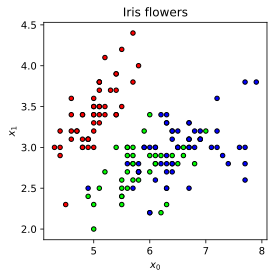

In [104]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

fig, ax = plt.subplots(figsize=(4,4))

ax.scatter(X[:,0], X[:,1], c=y,
           cmap=cmap_bold, edgecolor='k', 
           s=20);
ax.legend()
ax.set(xlabel='$x_0$', ylabel='$x_1$', title='Iris flowers');

The intuition behind the KNN algorithm is quite simple: assuming we have some training set of flowers $(\boldsymbol{X},\boldsymbol{y})$ 
which we know the features and which classes the flowers in the training set belong to. Now suppose we are predicting the class for an unseen flower $\boldsymbol{x}_{test}$. To do this we

1. Compute its distance with all flowers in the training set.
2. Find the $K$ "closest" flowers in the training set by our distance meature.
3. From the $K$ flowers, find the "majority class" $y_{test}$ these $K$ flowers belong to. You can think of this as the 
$K$ flowers "voting" for a class that $\boldsymbol{x}_{test}$ should belong to.
4. Predict the class of the unseen flower as $y_{test}$.

To implement KNN, you will need to use your implementation of `pairwise_distance_matrix` to compute pairwise distances between data points in the dataset.

If you are intereted in learning more about the KNN algorithm, also check out this [link](http://cs231n.github.io/classification/#knn) for more details.

In [107]:
def KNN(k, X, y, Xtest):
    """K nearest neighbors
    Arguments
    ---------
    k: int using k nearest neighbors.
    X: the training set
    y: the classes
    Xtest: the test set which we want to predict the classes

    Returns
    -------
    ypred: predicted classes for Xtest
    
    """
    N, D = X.shape
    M, _ = Xtest.shape
    num_classes = len(np.unique(y))
    
    # 1. Compute distance with all flowers
    distance = np.zeros((N, M)) # EDIT THIS to use "pairwise_distance_matrix"
    distance = pairwise_distance_matrix(X, Xtest)

    # 2. Find indices for the k closest flowers
    idx = np.argsort(distance.T, axis=1)[:, :K]
    
    # 3. Vote for the major class
    ypred = np.zeros((M, num_classes))

    for m in range(M):
        klasses = y[idx[m]]    
        for k in np.unique(klasses):
            ypred[m, k] = len(klasses[klasses == k]) / K

    return np.argmax(ypred, axis=1)

Let's take a closer look at how KNN behaves for the iris dataset.

In the cell below, we select a grid of points and use our KNN algorithm to predict the classes 
for each of the point on the grid. the color of the mesh shows the prediction of KNN at 
a particular point on the grid. 

Pay close attension to the boundaries (in fact, they are called
decision boundaries since points that lie on the boundaries can be predicted to either of the two
classes on the left and right of the boundaries).

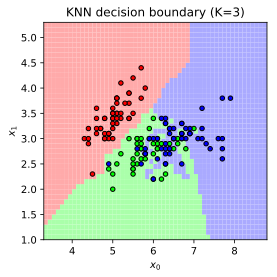

In [108]:
K = 3

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
step = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))

ypred = []
data = np.array([xx.ravel(), yy.ravel()]).T
ypred = KNN(K, X, y, data)

fig, ax = plt.subplots(figsize=(4,4))

ax.pcolormesh(xx, yy, ypred.reshape(xx.shape), cmap=cmap_light)
ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, edgecolor='k', s=20);
ax.set(xlabel='$x_0$', ylabel='$x_1$', title='KNN decision boundary (K={})'.format(K));